# Credit card fraud detention

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [3]:
data = pd.read_csv(r"C:\Users\santoshi\Downloads\creditcard.csv\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.shape

(284807, 31)

### Check the null values

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Check the duplicates

In [7]:
data.duplicated().sum()

np.int64(1081)

In [8]:
data.drop_duplicates(inplace= True)

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

- <i> 1 denotes fraudulent case and 0 denotes the legit</i>
- <i> We need to balance the unbalanced data. </i>

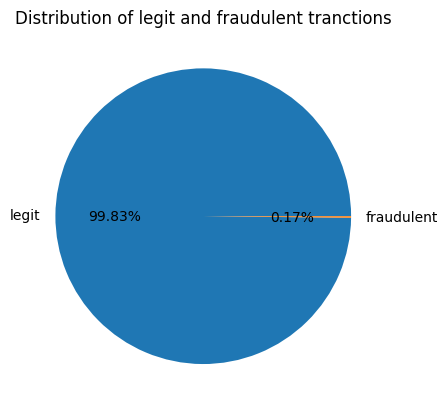

In [11]:
data['Class'].value_counts().plot(kind='pie',autopct="%1.2f%%", labels=['legit','fraudulent'])
plt.xlabel("")
plt.ylabel("")
plt.title("Distribution of legit and fraudulent tranctions")
plt.show()

In [12]:
fraudulent = data[data['Class'] == 1]
legit = data[data['Class'] == 0]

In [13]:
fraudulent

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [14]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [15]:
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,...,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.0
mean,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.001150,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575,0.0
std,47475.550607,1.922179,1.633520,1.457593,1.398575,1.355816,1.329914,1.177480,1.157140,1.086902,...,0.715629,0.723541,0.621165,0.605748,0.520612,0.482080,0.392700,0.327563,250.379023,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54233.000000,-0.913431,-0.601398,-0.883966,-0.851605,-0.687888,-0.767543,-0.550146,-0.208841,-0.641649,...,-0.228406,-0.542737,-0.161490,-0.354306,-0.317476,-0.326853,-0.070650,-0.052808,5.670000,0.0
50%,84711.000000,0.022562,0.062561,0.182247,-0.024500,-0.052807,-0.274172,0.041664,0.021633,-0.051368,...,-0.029798,0.006675,-0.011077,0.041115,0.016190,-0.052293,0.001368,0.011238,22.000000,0.0
75%,139308.000000,1.316788,0.797012,1.028261,0.734231,0.612442,0.397678,0.571029,0.324473,0.596969,...,0.185470,0.528136,0.147633,0.440051,0.350490,0.240023,0.090760,0.077961,77.460000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [16]:
fraudulent.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
data.groupby('Class').mean()
# The mean value of amount of transaction is different in both the class.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


Due to ''Undersampling'' ,  we need to build the dataset containing similar distribution of both the class.

In [18]:
legit_new = legit.sample(n=473)

In [19]:
data_new = pd.concat([legit_new,fraudulent])

In [20]:
data_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
272380,165059.0,1.954320,-0.601255,-0.336373,0.318712,-0.726208,-0.037220,-0.849702,0.196205,1.196176,...,0.185757,0.675356,0.130278,-0.367591,-0.321441,0.578047,-0.027790,-0.062811,11.50,0
127279,78274.0,-0.489273,-0.319371,1.807405,-0.873694,-1.373629,0.142935,0.142667,0.178476,1.209201,...,0.322462,0.940003,0.150414,0.131014,-0.265826,0.353668,0.141423,0.139828,156.75,0
215321,140022.0,0.099783,0.874501,1.667311,2.694824,0.648466,1.183961,0.298414,0.239336,-1.026956,...,0.298013,1.013142,-0.094168,0.680630,-0.461303,-0.064349,-0.112952,-0.206264,9.83,0
184378,126218.0,2.050653,-0.948182,-0.719713,-0.426509,-0.665621,0.013811,-0.776126,-0.069250,0.181472,...,-0.562432,-1.078304,0.273191,-1.128674,-0.410530,-0.560949,0.056971,-0.025604,64.35,0
216853,140662.0,-0.357057,1.230575,-0.827874,-1.080244,1.226201,-1.568602,1.779215,-0.507503,-0.432550,...,0.251216,1.011180,-0.140041,1.230159,-0.236137,0.030188,0.502546,0.362256,24.60,0


In [21]:
data_new.shape

(946, 31)

In [22]:
data_new.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,90330.852008,-0.227284,-0.112804,0.093696,-0.022817,0.084355,-0.031361,-0.064561,-0.103991,-0.030709,...,-0.032520,-0.002818,-0.060678,-0.009800,-0.019718,0.003150,-0.017422,-0.006886,-0.038081,83.327759
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


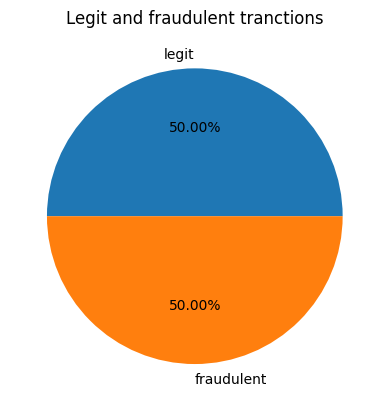

In [23]:
data_new['Class'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['legit','fraudulent'])
plt.ylabel("")
plt.title("Legit and fraudulent tranctions")
plt.show()

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

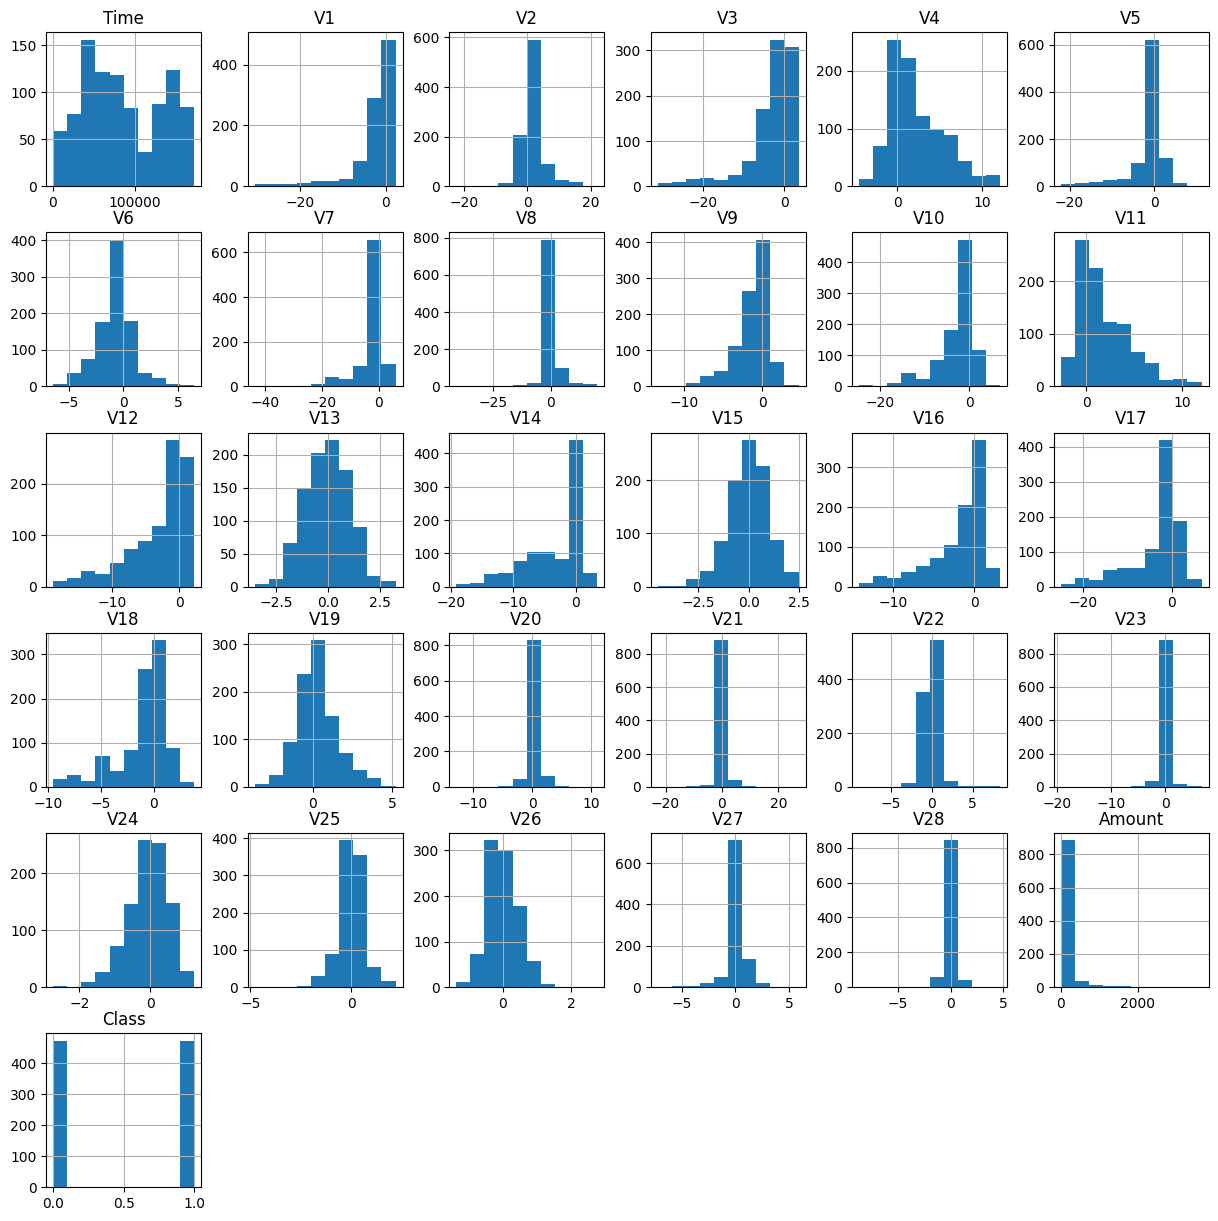

In [24]:
data_new.hist(figsize=(15,15))

In [25]:
data_new.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.229876,-0.198691,0.138285,-0.196328,0.280864,0.124835,0.213229,-0.193460,0.166594,...,-0.044588,0.135530,0.064227,-0.042425,-0.207745,-0.052612,-0.153172,-0.001449,-0.003166,-0.103043
V1,0.229876,1.000000,-0.705503,0.864900,-0.593640,0.840919,0.365653,0.857552,-0.220393,0.649714,...,0.111256,-0.106568,0.011209,-0.076013,-0.105110,0.025904,0.080226,0.215268,-0.057437,-0.398715
V2,-0.198691,-0.705503,1.000000,-0.815813,0.652030,-0.765574,-0.312661,-0.809401,0.135168,-0.691322,...,-0.083805,0.104075,0.093979,-0.001142,0.116963,0.023909,-0.128708,0.155674,-0.262146,0.478409
V3,0.138285,0.864900,-0.815813,1.000000,-0.770063,0.840943,0.484139,0.879557,-0.290140,0.760814,...,0.071250,-0.099185,0.000691,0.020538,-0.104961,-0.056589,-0.014779,0.090583,-0.026730,-0.563752
V4,-0.196328,-0.593640,0.652030,-0.770063,1.000000,-0.569685,-0.435474,-0.709951,0.160636,-0.791114,...,-0.046331,0.158498,0.015603,-0.062818,-0.019446,0.160264,0.065445,-0.049010,0.027503,0.709008
V5,0.280864,0.840919,-0.765574,0.840943,-0.569685,1.000000,0.298424,0.835114,-0.316960,0.653408,...,0.083549,-0.123082,-0.074050,-0.134943,-0.115136,0.052000,0.091119,0.094852,-0.112500,-0.368738
V6,0.124835,0.365653,-0.312661,0.484139,-0.435474,0.298424,1.000000,0.341413,-0.543925,0.359639,...,-0.208723,0.173269,0.264444,-0.006620,-0.129190,-0.044015,-0.235328,-0.074346,0.149535,-0.417029
V7,0.213229,0.857552,-0.809401,0.879557,-0.709951,0.835114,0.341413,1.000000,-0.053433,0.777801,...,0.201151,-0.243160,-0.029800,-0.052258,0.045145,-0.010553,0.151246,0.089986,0.117143,-0.462320
V8,-0.193460,-0.220393,0.135168,-0.290140,0.160636,-0.316960,-0.543925,-0.053433,1.000000,-0.101939,...,0.378316,-0.346781,-0.308127,0.037246,0.294386,0.026308,0.394882,0.064020,0.009943,0.129518
V9,0.166594,0.649714,-0.691322,0.760814,-0.791114,0.653408,0.359639,0.777801,-0.101939,1.000000,...,0.183756,-0.266071,-0.059329,0.013514,-0.027094,-0.157025,0.046389,0.072601,0.011984,-0.551769


### Split into features and target variable

In [26]:
x = data_new.drop('Class', axis=1)

In [27]:
y = data_new.Class

### Split the data into training and testing data

In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,stratify=y,random_state=1)

### Train a model

#### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_pred_train = model.predict(x_train)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy = accuracy_score(y_pred_train,y_train)
print("Accuracy of training data:", accuracy*100,"%")

Accuracy of training data: 93.25396825396825 %


In [32]:
y_pred_test = model.predict(x_test)
test_accuracy = accuracy_score(y_pred_test,y_test)
print("Accuracy of test data:",test_accuracy*100,"%")

Accuracy of test data: 95.78947368421052 %


In [33]:
print(classification_report(y_test , y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        95
           1       0.96      0.96      0.96        95

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190



### Random Forest classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
acc_rf = accuracy_score(y_test,y_pred)
print("Accuracy of test data:",acc_rf*100,"%")


Accuracy of test data: 96.84210526315789 %
